In [2]:
import glob
import numpy as np
import os.path as path
from scipy import misc

In [3]:
IMAGE_PATH = 'train'
file_paths = glob.glob(path.join(IMAGE_PATH, '*c.png'))

In [4]:
images = [misc.imread(path) for path in file_paths]
images = np.asarray(images)

C:\Users\JLipemelton\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [5]:
image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(images.shape)
print(image_size)

(988, 128, 118, 4)
[128 118   4]


In [6]:
images = images / 255

In [7]:
n_images = int(images.shape[0])
labels = np.zeros(n_images+1)
import csv
with open('train_labels.csv', newline='') as labelcsv:
    spamreader = csv.reader(labelcsv, delimiter=' ')
    i = 0
    for row in spamreader:
        #print(row[0][5:])
        if i != 0:
            labels[i] = int(row[0][5:])
        i+=1
labels = labels[1:]
labels = labels.astype(int)
assert(labels.size == images.shape[0])
#labels

In [8]:
import matplotlib.pyplot as plt
plt.imshow(images[10])
ones = []
for i in range(len(labels)):
    if labels[i] == 1:
        ones.append(i)
ones[:10]

[1, 5, 29, 31, 41, 55, 57, 66, 73, 77]

In [9]:
# Split into test and training sets
TRAIN_TEST_SPLIT = 0.9

# Split at the given index
split_index = int(TRAIN_TEST_SPLIT * n_images)
shuffled_indices = np.random.permutation(n_images)
train_indices = shuffled_indices[0:split_index]
test_indices = shuffled_indices[split_index:]

# Split the images and the labels
x_train = images[train_indices, :, :]
y_train = labels[train_indices]
x_test = images[test_indices, :, :]
y_test = labels[test_indices]



#split_index = int(TRAIN_TEST_SPLIT * n_images)
#x_train = images[split_index, :, :]
#y_train = labels[split_index]
#x_test = images[split_index, :, :]
#y_test = labels[split_index]

In [10]:
# Imports
import keras
import tensorflow as tf
from datetime import datetime

C:\Users\JLipemelton\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu"),
    keras.layers.AveragePooling2D(pool_size=3),
    keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu"),
    keras.layers.AveragePooling2D(pool_size=3),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(rate=.5),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(11, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=5)


Epoch 1/5
256/889 [=======>......................] - ETA: 1:21 - loss: 2.3841 - acc: 0.1133

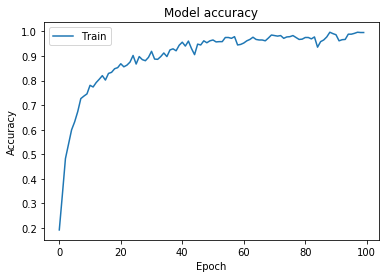

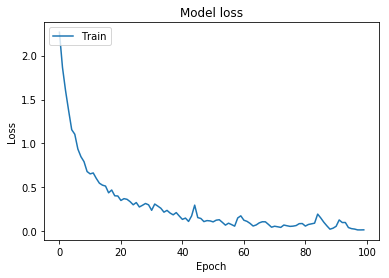

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
predictions = model.predict(x_test)

In [14]:
actual_totals = [0,0,0,0,0,0,0,0,0,0,0]
pred_totals = [0,0,0,0,0,0,0,0,0,0,0]
pred_correct = [0,0,0,0,0,0,0,0,0,0,0]

# print(predicted[0:10])
# print(np.argmax(predicted[0]))
i=0
for p in predictions:
    pred_totals[np.argmax(p)]+=1
    if(np.argmax(p)==y_test[i]):
        pred_correct[np.argmax(p)]+=1
    actual_totals[int(y_test[i])]+=1
    i+=1
    
print(actual_totals)
print(pred_totals)
print(pred_correct)

[7, 17, 8, 17, 5, 8, 4, 9, 14, 7, 3]
[8, 19, 7, 14, 4, 10, 4, 8, 17, 7, 1]
[7, 16, 6, 12, 3, 8, 4, 7, 13, 7, 1]


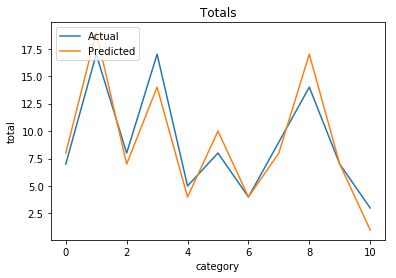

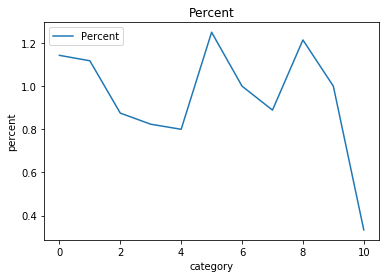

In [15]:
plt.plot(actual_totals)
plt.plot(pred_totals)
plt.title('Totals')
plt.ylabel('total')
plt.xlabel('category')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()

percent = [x/y for x, y in zip(pred_totals, actual_totals)]

plt.plot(percent)
plt.title('Percent')
plt.ylabel('percent')
plt.xlabel('category')
plt.legend(['Percent'], loc='upper left')
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

99/99 [==============================] - 5s 49ms/step
Test accuracy: 0.8484848484848485
